# Compare the LR results before and after correcting the Gaussian code

In [2]:
import numpy as np
from astropy.table import Table, join
import os
from matplotlib import pyplot as plt

## Load data

In [4]:
old = Table.read("../lofar_pw_pdf.fits")

In [5]:
new = Table.read("../lofar_pw_corSigma.fits")

In [6]:
len(old)

318769

In [7]:
len(new)

325694

In [8]:
old.colnames

['Source_Name',
 'RA',
 'E_RA',
 'DEC',
 'E_DEC',
 'Peak_flux',
 'E_Peak_flux',
 'Total_flux',
 'E_Total_flux',
 'Maj',
 'E_Maj',
 'Min',
 'E_Min',
 'PA',
 'E_PA',
 'Isl_rms',
 'S_Code',
 'Mosaic_ID',
 'AllWISE',
 'objID',
 'ra',
 'dec',
 'raErr',
 'decErr',
 'W1mag',
 'W1magErr',
 'i',
 'iErr',
 'colour',
 'category',
 'lr',
 'lr_dist']

In [9]:
pwl = join(old, new, 
           join_type='left', 
           keys='Source_Name', 
           uniq_col_name='{col_name}{table_name}', 
           table_names=['_old', '_new'])

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 2.00000e+00, 5.00000e+00, 2.00000e+00, 1.30000e+01,
        6.00000e+00, 7.00000e+00, 1.80000e+01, 3.70000e+01, 5.70000e+01,
        8.90000e+01, 1.35000e+02, 2.16000e+02, 3.89000e+02, 7.63000e+02,
        1.32600e+03, 2.74000e+03, 6.54800e+03, 1.66990e+04, 5.02190e+04,
        1.87843e+05, 1.12860e+04, 5.62400e+03, 3.65700e+03, 2.55500e+03,
        1.78100e+03, 1.24700e+03, 9.87000e+02, 6.21000e+02, 4.85000e+02,
        3.42000e+02, 3.08000e+02, 2.37000e+02, 2.07000e+02, 1.57000e+02,
        9.60000e+01, 9.30000e+01, 7.60000e+01, 8.00000e+01, 6.50000e+01,
        3.90000e+01, 2.20000e+01, 1.90000e+01, 1.20000e+01, 6.00000e+00]),
 array([-3736.78453907, -3590.04282495, -3443.30111083, -3296.5593967 ,
        -3149.81768258, -3003.07596845, -2856.33425433, -2709.5925402 ,
        -2562.85082608, -2416.10911196, -2269.36739783, -2122.62568371,
        -1975.88396958, -1829.14225546, -1682.400541

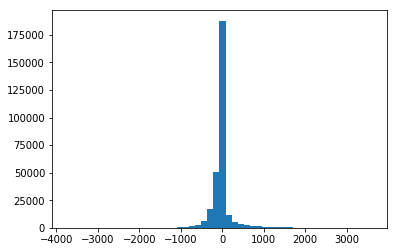

In [10]:
A = pwl["lr_new"]-pwl["lr_old"]
plt.hist(A[~np.isnan(A)], bins=50)

In [11]:
cond = (pwl['ra_old'] == pwl['ra_new']) & (pwl['dec_old'] == pwl['dec_new'])

In [12]:
# Galaxies with the same id (or lack of id)
np.sum(cond)

304332

In [13]:
len(pwl) - np.sum(cond)

14439

In [14]:
pwl[cond & np.isnan(pwl["lr_new"])]

Source_Name,RA_old,E_RA_old,DEC_old,E_DEC_old,Peak_flux_old,E_Peak_flux_old,Total_flux_old,E_Total_flux_old,Maj_old,E_Maj_old,Min_old,E_Min_old,PA_old,E_PA_old,Isl_rms_old,S_Code_old,Mosaic_ID_old,AllWISE_old,objID_old,ra_old,dec_old,raErr_old,decErr_old,W1mag_old,W1magErr_old,i_old,iErr_old,colour_old,category_old,lr_old,lr_dist_old,RA_new,E_RA_new,DEC_new,E_DEC_new,Peak_flux_new,E_Peak_flux_new,Total_flux_new,E_Total_flux_new,Maj_new,E_Maj_new,Min_new,E_Min_new,PA_new,E_PA_new,Isl_rms_new,S_Code_new,Mosaic_ID_new,AllWISE_new,objID_new,ra_new,dec_new,raErr_new,decErr_new,W1mag_new,W1magErr_new,i_new,iErr_new,colour_new,category_new,lr_new,lr_dist_new
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,arcsec,deg,arcsec,mJy / beam,mJy / beam,mJy,mJy,arcsec,arcsec,arcsec,arcsec,deg,deg,mJy / beam,,,,,,,,,,,,,,,,
str22,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,str11,str19,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,str8,str19,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ILTJ104358.55+513354.6,160.99396170310192,0.3804751732950043,51.56517118870972,0.35519395523884045,0.7504358543374862,0.11003057760648959,0.7238821644431407,0.1929865180123449,6.052143496251171,0.9112500467753947,5.741264073240394,0.8197450714237257,112.23586180232195,114.35902138229292,0.11110970808658749,S,P4Hetdex16,N/A,999999,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,nan,nan,160.99396170310192,0.3804751732950043,51.56517118870972,0.35519395523884045,0.7504358543374862,0.11003057760648959,0.7238821644431407,0.1929865180123449,6.052143496251171,0.9112500467753947,5.741264073240394,0.8197450714237257,112.23586180232195,114.35902138229292,0.11110970808658749,S,P4Hetdex,N/A,999999,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,nan,nan
ILTJ104406.52+513113.1,161.02716295073938,0.4011857454685031,51.52030892960141,0.2956757648741586,0.7270173923847574,0.10214151036916275,0.6074119548975849,0.1909636448440653,6.268112922677453,1.0178900114002445,4.801343377156147,0.5835977430401842,60.57505752252567,21.443186110238656,0.10890992416534573,S,P4Hetdex16,N/A,999999,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,nan,nan,161.02716295073938,0.4011857454685031,51.52030892960141,0.2956757648741586,0.7270173923847574,0.10214151036916275,0.6074119548975849,0.1909636448440653,6.268112922677453,1.0178900114002445,4.801343377156147,0.5835977430401842,60.57505752252567,21.443186110238656,0.10890992416534573,S,P4Hetdex,N/A,999999,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,nan,nan
ILTJ104418.69+522635.8,161.07788017007587,0.1392443079737803,52.44328024264552,0.15365161017254791,1.8803603269742886,0.10945499310990824,1.8244981225922174,0.1916173331372365,6.083887081701809,0.36475149468082985,5.744506125661684,0.3246577502745283,13.250364279525344,39.6429350698305,0.11037105286959559,S,P4Hetdex16,N/A,999999,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,nan,nan,161.07788017007587,0.1392443079737803,52.44328024264552,0.15365161017254791,1.8803603269742886,0.10945499310990824,1.8244981225922174,0.1916173331372365,6.083887081701809,0.36475149468082985,5.744506125661684,0.3246577502745283,13.250364279525344,39.6429350698305,0.11037105286959559,S,P4Hetdex,N/A,999999,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,nan,nan
ILTJ104435.58+523504.2,161.1482631171491,0.08568213610331692,52.58450341354888,0.0830429609908379,3.208150878287284,0.10862472207765825,3.065275865605974,0.19105289251250496,5.914684271250655,0.2018966289669094,5.818499590408209,0.19541653134798362,79.7336792381118,84.64457548122874,0.10991691669914871,S,P4Hetdex16,N/A,999999,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,nan